<a href="https://colab.research.google.com/github/PondKann/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = '/content/drive/My Drive/DataViz_2021'
os.listdir(path)

['pm-18-jan-2021.csv',
 'covid-19-daily_data_dictionary.xlsx',
 'income.csv',
 'income2.xls',
 'จัดซื้อ 57-58.xls',
 'online_retail_II.xlsx',
 'online_retail_II.csv',
 'dataClean.csv',
 'search_click.csv',
 'example_timestamp.csv',
 'example_timestamp_02.csv',
 'search_request.csv']

In [3]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


### เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime (Timestamp)มันเหมือนกัน

In [5]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar Chart (กราฟแท่ง)

#### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อค้นหาร้านอาหารในแต่ละวัน
` ` `matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs) ` ` `

In [6]:
from matplotlib import pyplot as plt 
from datetime import datetime,time

ส่วนประกอบของกราฟแท่ง
- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (x)
- ชื่อแท่ง tick_label
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel)

การแสดงตัวอักษรภาษาไทยในกราฟ 
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [7]:
import matplotlib as mpl 
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'เทียบปริมาณคนเข้าใช้ Web Wongnai.com ในแต่ละวัน')

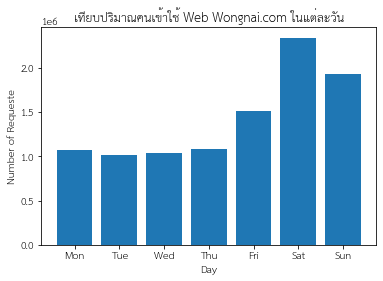

In [8]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek==0].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==1].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==2].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==3].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==4].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==5].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==6].shape[0]
                                ],tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun' ] )
plt.xlabel('Day')
plt.ylabel('Number of Requeste')
plt.title('เทียบปริมาณคนเข้าใช้ Web Wongnai.com ในแต่ละวัน')

วันจันทร์ และ ช่วงเวลาก่อนเที่ยง

In [15]:
mon11 = data[(data['search_timestamp'].dt.dayofweek==0) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
tue11 = data[(data['search_timestamp'].dt.dayofweek==1) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
wed11 = data[(data['search_timestamp'].dt.dayofweek==2) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
thu11 = data[(data['search_timestamp'].dt.dayofweek==3) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
fri11 = data[(data['search_timestamp'].dt.dayofweek==4) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
sat11 = data[(data['search_timestamp'].dt.dayofweek==5) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
son11 = data[(data['search_timestamp'].dt.dayofweek==6) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]

### Grouped bar chart

แสดงปริมาณคนเข้าใช้เว็ปในแต่ละวัน

In [9]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [18]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [11]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [12]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [13]:
import numpy as np

In [19]:
x

array([0, 1, 2, 3, 4, 5, 6])

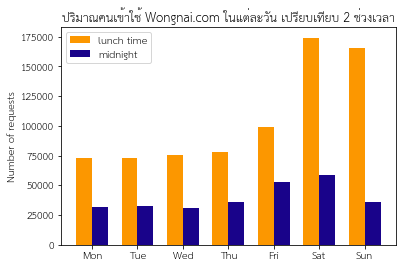

In [21]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

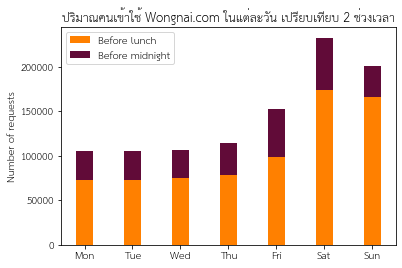

In [33]:
import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='Before lunch',color = '#FF8000')
ax.bar(labels, b4midnight, width,bottom=b4lunch, label='Before midnight', color='#610B38')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

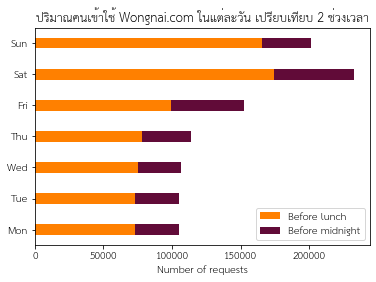

In [39]:
import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='Before lunch',color = '#FF8000')
ax.barh(labels, b4midnight, width, left=b4lunch, label='Before midnight', color='#610B38')

ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

In [48]:
labels2 = ['Before lunch','Before midnight']

In [53]:
labels

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# เช็คชื่อ โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

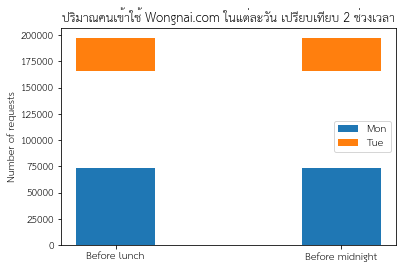

In [63]:

fig, ax = plt.subplots()

ax.bar(labels2, b4lunch[0], width, label='Mon')
ax.bar(labels2, b4midnight[1], width, bottom=b4lunch, label='Tue')
ax.bar(labels2, b4midnight[2], width, bottom=b4lunch, label='Wed')
ax.bar(labels2, b4midnight[3], width, bottom=b4lunch, label='Thu')
ax.bar(labels2, b4midnight[4], width, bottom=b4lunch, label='Fri')
ax.bar(labels2, b4midnight[5], width, bottom=b4lunch, label='Sat')
ax.bar(labels2, b4midnight[6], width, bottom=b4lunch, label='Sun')


ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()